<a href="https://colab.research.google.com/github/Trickshotblaster/nn-practices/blob/main/PracticeCharNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
mytensor = torch.randn(5, 5).to(device)

i have some ideas i wanna try

In [4]:
mytensor.cpu()

tensor([[ 3.1111,  1.7866,  0.9312, -0.5678, -2.0771],
        [ 1.6637, -0.4045,  0.0543,  0.7117, -1.3718],
        [ 0.0768,  0.8824,  0.6401,  0.2464,  0.3956],
        [ 0.6138, -1.1618,  1.0472, -1.0849,  0.0357],
        [-0.5681, -0.0468, -0.5384, -0.6728, -0.5374]])

In [21]:
class NeuralNet:
  def __init__(self, inputSize=10, hiddenSizes=[400, 200, 300, 100], memorySize=100):
    self.memoryMat = torch.randn(memorySize, memorySize, requires_grad=True).to(device)
    self.hiddens = [torch.randn(inputSize, hiddenSizes[0], requires_grad=True).to(device) / (inputSize ** 0.5)]
    self.biases = [torch.randn(hiddenSizes[0], requires_grad=True).to(device)]
    for last, size in zip(hiddenSizes, hiddenSizes[1:]):
      self.hiddens.append(torch.randn(last, size, requires_grad=True).to(device) / (last ** 0.5))
      self.biases.append(torch.randn(size, requires_grad=True).to(device) * 0.01)
  def __call__(self, input):
    input = input.to(device)
    out = (input @ self.hiddens[0] + self.biases[0]).tanh()
    for layer, bias in zip(self.hiddens[1:], self.biases[1:]):
      out = (out @ layer + bias).tanh()
    return out

In [6]:
mynet = NeuralNet()

In [7]:
[x.shape for x in mynet.hiddens]

[torch.Size([10, 400]),
 torch.Size([400, 200]),
 torch.Size([200, 300]),
 torch.Size([300, 100])]

In [8]:
mynet(torch.randn(10))

tensor([ 0.5849,  0.1298,  0.0441, -0.4259,  0.4480, -0.1019, -0.7864, -0.3878,
         0.6124,  0.0739,  0.1874,  0.0046,  0.5342, -0.1458, -0.1220,  0.5939,
         0.5860, -0.0762, -0.2817, -0.2144, -0.1661, -0.7973,  0.0191,  0.4999,
         0.1439, -0.1350,  0.0651,  0.7094, -0.0262,  0.1476,  0.3958,  0.0930,
        -0.0625, -0.6924,  0.1736, -0.3947, -0.5518,  0.4304,  0.6136,  0.7403,
         0.2832,  0.2581,  0.4119, -0.0423,  0.1967,  0.1873,  0.1409,  0.1298,
        -0.0202,  0.3572, -0.3630, -0.1541, -0.5550, -0.4830,  0.3975, -0.1109,
        -0.4316, -0.4512, -0.7925, -0.2216, -0.1646, -0.3512,  0.7024,  0.4883,
        -0.1946, -0.0968, -0.6381, -0.2922,  0.2200, -0.0899,  0.0205, -0.2357,
         0.1155, -0.3126, -0.5127, -0.0832, -0.2763, -0.3941,  0.0610, -0.5159,
        -0.5989, -0.1889,  0.2222, -0.1454,  0.0441,  0.3890, -0.0975, -0.4112,
         0.4564,  0.2021, -0.2226, -0.2250,  0.3339,  0.2279,  0.1725,  0.1433,
        -0.8666, -0.7259, -0.1035, -0.05

(array([ 7.,  6.,  9., 14., 14., 11., 17., 10.,  9.,  3.]),
 array([-0.84602678, -0.6810959 , -0.51616508, -0.3512342 , -0.18630335,
        -0.0213725 ,  0.14355835,  0.3084892 ,  0.47342008,  0.6383509 ,
         0.80328178]),
 <BarContainer object of 10 artists>)

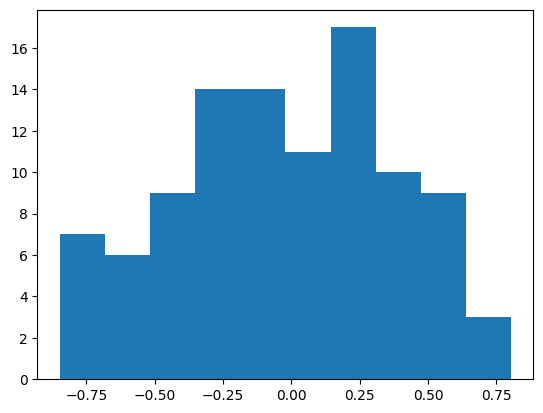

In [9]:
import matplotlib.pyplot as plt

plt.hist(mynet(torch.randn(10).to(device)).cpu().flatten().numpy())

ok watch this

In [10]:
my_dataset = "skibidi"
vocab = ["."] + sorted(list(set(my_dataset)))
stoi = {char:i for i, char in enumerate(vocab)}
itos = {i:char for i, char in enumerate(vocab)}


In [11]:
stoi["."]

0

In [12]:
itos[0]

'.'

In [17]:
def make_dataset(text, context_len):
  xs, ys = [], []
  context = [0] * context_len
  splitwords = text.split()
  for word in splitwords:
    word = "." + word + "."
    for last, char in zip(word, word[1:]):
      context = context[1:] + [stoi[last]]
      xs.append(context)
      ys.append(stoi[char])
  return torch.tensor(xs), torch.tensor(ys)

In [18]:
Xs, Ys = make_dataset(my_dataset, 2)

In [19]:
Xs

tensor([[0, 0],
        [0, 5],
        [5, 4],
        [4, 3],
        [3, 1],
        [1, 3],
        [3, 2],
        [2, 3]])

In [20]:
Ys

tensor([5, 4, 3, 1, 3, 2, 3, 0])

In [ ]:
train_len = len(Xs)

In [ ]:
num_epochs = 10000
lr = 0.1
batch_size = 16

In [ ]:
for epoch in range(num_epochs):
  batch_indices = torch.randint(0, train_len-1, (batch_size,))
